In [1]:
import json

# Load the JSON data from a file
with open('/home/hb/LLM-research/finetuning_dataset/BGP_knowledge_regen_v2.json', 'r') as file:
    data = json.load(file)

# Create a new list to store the extracted fields
extracted_data = []

# Loop through each object in the JSON data
for item in data:
    if "instruction" in item and "input" in item and "output" in item:
        extracted_item = {
            "instruction": item["instruction"],
            "input": item["input"],
            "output": item["output"]
        }
        extracted_data.append(extracted_item)

# Save the extracted data into a new JSON file
with open('BGP_knowledge_v2.json', 'w') as output_file:
    json.dump(extracted_data, output_file, indent=4)

print("Extracted data saved to 'extracted_data.json'")


Extracted data saved to 'extracted_data.json'


In [1]:
import json

jsonfile = "/home/hb/LLM-research/finetuning_dataset/BGP/BGPKnowledge/BGP_knowledge_all.json"

# Load JSON data from file
with open(jsonfile, "r") as f:
    json_data = json.load(f)

num_elements = len(json_data)

print("Number of elements in the JSON object:", num_elements)

Number of elements in the JSON object: 20000


In [1]:
import json

# List of JSON file paths to merge
file_paths = ['/home/hb/LLM-research/finetuning_dataset/BGP/PyBGPStream/PyBGP_real_cases_2031.json',
              '/home/hb/LLM-research/finetuning_dataset/BGP/PyBGPStream/PyBGPStream_real_time_1501.json']

# Initialize an empty list to store the merged data
merged_data = []

# Iterate through each JSON file and merge its contents
for file_path in file_paths:
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            if isinstance(data, list):
                merged_data.extend(data)  # Merge the list of dictionaries
            else:
                print(f"File '{file_path}' does not contain a list of dictionaries. Skipping...")
    except FileNotFoundError:
        print(f"File '{file_path}' not found. Skipping...")

# Save the merged data to a new JSON file
output_file = '/home/hb/LLM-research/finetuning_dataset/BGP/PyBGPStream/BGP_real_cases_realtime_3500.json'
with open(output_file, 'w') as file:
    json.dump(merged_data, file, indent=4)

print(f'Merged data saved to {output_file}')

Merged data saved to /home/hb/LLM-research/finetuning_dataset/BGP/PyBGPStream/BGP_real_cases_realtime_3500.json


In [4]:
import os
import json

def check_json_format(
    seed_tasks_path="/home/hb/LLM-research/finetuning_dataset/BGP/seed_task_real_cases.jsonl",
):
    with open(seed_tasks_path, "r") as file:
        for line in file:
            seed_task = json.loads(line)
            if "instances" not in seed_task:
                print(f"Seed task with id '{seed_task['id']}' is missing 'instances' field.")
            else:
                print(seed_task)

check_json_format()

{'id': 'seed_task_0', 'name': 'Google May 2005 Outage', 'instruction': "Visualize the BGP update timeline for the prefix 64.233.161.0/24 during the time window from May 7, 2005, 00:00:00 to May 7, 2005, 23:59:00. Use data from multiple RouteViews collectors, including route-views2, route-views3, route-views4, ris-ripe, bview, and rib, and collect BGP update records of type 'A' (Announcements) for this prefix. Plot the timeline to show how different Autonomous Systems (ASes) contributed to the announcements over time.", 'instances': [{'input': 'Time window: May 7, 2005, 00:00:00 to May 7, 2005, 23:59:00\nCollectors: route-views2, route-views3, route-views4, ris-ripe, bview, rib\nRecord Type: updates (Announcements)\nPrefix of Interest: 64.233.161.0/24', 'output': 'import pybgpstream\nimport matplotlib.pyplot as plt\nfrom datetime import datetime\n\n# Define the time window around the TTNet incident\nstart_time = "2005-05-07 00:00:00"\nend_time = "2005-05-07 23:59:00"\n\n# Initialize the

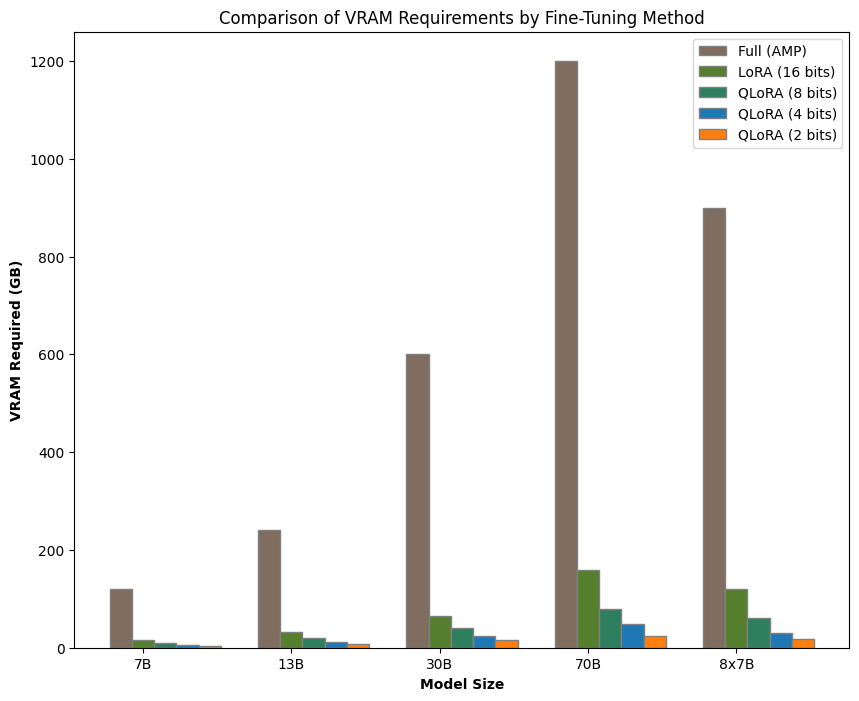

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model sizes
model_sizes = ['7B', '13B', '30B', '70B', '8x7B']

# VRAM requirements for each fine-tuning method
vram_full_amp = [120, 240, 600, 1200, 900]  # Full method with AMP
vram_lora = [16, 32, 64, 160, 120]  # LoRA
vram_qlora_8 = [10, 20, 40, 80, 60]  # QLoRA with 8 bits
vram_qlora_4 = [6, 12, 24, 48, 30]  # QLoRA with 4 bits
vram_qlora_2 = [4, 8, 16, 24, 18]  # QLoRA with 2 bits

# Set the width of the bars
barWidth = 0.15

# Set position of bar on X axis
r1 = np.arange(len(model_sizes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.figure(figsize=(10, 8))
plt.bar(r1, vram_full_amp, color='#7f6d5f', width=barWidth, edgecolor='grey', label='Full (AMP)')
plt.bar(r2, vram_lora, color='#557f2d', width=barWidth, edgecolor='grey', label='LoRA (16 bits)')
plt.bar(r3, vram_qlora_8, color='#2d7f5e', width=barWidth, edgecolor='grey', label='QLoRA (8 bits)')
plt.bar(r4, vram_qlora_4, color='#1f77b4', width=barWidth, edgecolor='grey', label='QLoRA (4 bits)')
plt.bar(r5, vram_qlora_2, color='#ff7f0e', width=barWidth, edgecolor='grey', label='QLoRA (2 bits)')

# Add xticks on the middle of the group bars
plt.xlabel('Model Size', fontweight='bold')
plt.ylabel('VRAM Required (GB)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(model_sizes))], model_sizes)

# Create legend & Show graphic
plt.legend()
plt.title('Comparison of VRAM Requirements by Fine-Tuning Method')
plt.show()